### A quick notebook to check:
- Satellite tracks in the three files
- FOM of the 3 files (fully plotted)

In [1]:
# import stuff
import sys,os,os.path

sys.path.append("../../")   # cite IC from parent directory
sys.path.append("/home/e78368jw/Documents/NEXT_CODE/next_misc/")
#sys.path.append(os.path.expanduser('~/code/eol_hsrl_python'))
os.environ['ICTDIR']='/home/e78368jw/Documents/NEXT_CODE/IC'

import core.functions as func
import numpy as np
import matplotlib.pyplot as plt


#### Satellite track code

In [2]:

def load_and_plot(file_path, title = "Low pressure track energies"):
    '''
    load in data and plot low pressure track energies    
    '''
    file = func.load_data(file_path)
    tracks = file[0]
    particles = file[1]
    evtmap = file[2]

    func.energy_track_plots(tracks, title)

def load_and_plot_and_cut(file_path, title = "Low pressure track energies"):
    '''
    load in data and plot low pressure track energies    
    '''
    # load
    file = func.load_data(file_path)
    tracks = file[0]
    particles = file[1]
    evtmap = file[2]

    # cut
    tracks_low_E = func.remove_low_E_events(tracks)

    # plot
    func.energy_track_plots(tracks_low_E, title)

def load_plot_cut_FOM(file_path, title = "Low pressure track energies"):
    '''
    load in data and plot low pressure track energies    
    '''
    # load
    file = func.load_data(file_path)
    tracks = file[0]
    particles = file[1]
    evtmap = file[2]

    # cut
    tracks_low_E = func.remove_low_E_events(tracks)

    # apply cuts
    cuts = np.linspace(0,0.6, 61, endpoint = True)

    cut_tracks = func.apply_cuts(tracks_low_E, lower_z = 20, upper_z = 1170, r_lim = 415)
    fom_vals = func.apply_FOM(file_path, cut_tracks[0], cut_list = cuts, plot = True, plot_title = title)
    return fom_vals
# read in the data files
#file_60_8 = func.load_data('data/60_8e-3/isaura/')
#tracks_60 = file_60_8[0]
#particles_60 = file_60_8[1]
#evtmap = file_60_8[2]
#file_75_8 = func.load_data('data/75_8e-3/isaura/')
#file_90_8 = func.load_data('data/90_8e-3/isaura/')

50
100
150
200
250
300


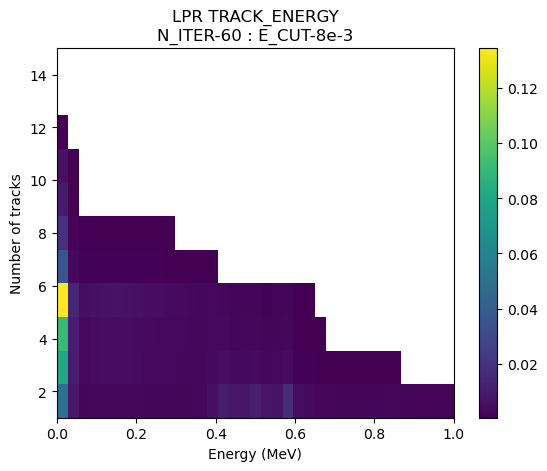

50
100
150
200
250
300


/home/e78368jw/Documents/NEXT_CODE/next_misc/core/functions.py:233: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  remove_low_E['numb_of_tracks'] = remove_low_E['event'].map(event_counts)


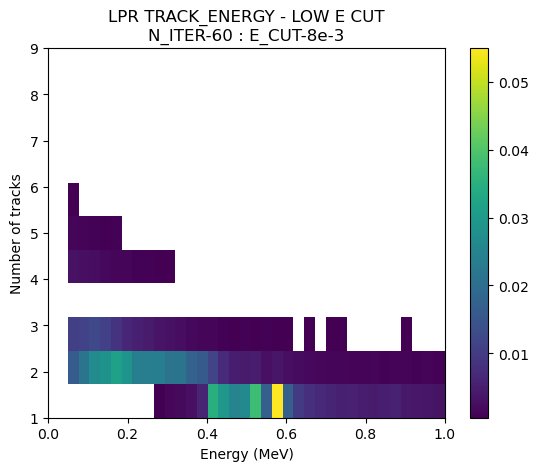

In [15]:
load_and_plot('data/60_8e-3/isaura/', 'LPR TRACK_ENERGY\nN_ITER-60 : E_CUT-8e-3')
load_and_plot_and_cut('data/60_8e-3/isaura/', 'LPR TRACK_ENERGY - LOW E CUT\nN_ITER-60 : E_CUT-8e-3')

50
100
150
200
250
300


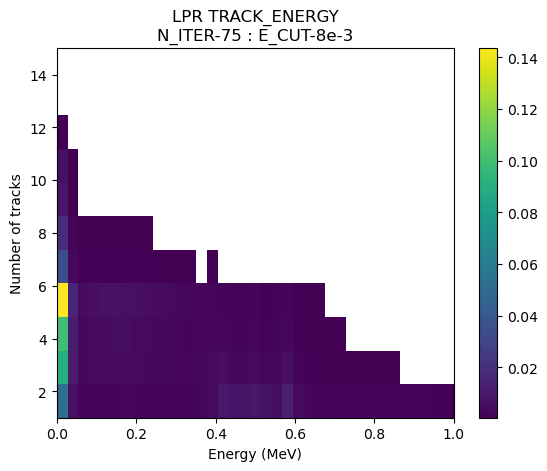

50
100
150
200
250
300


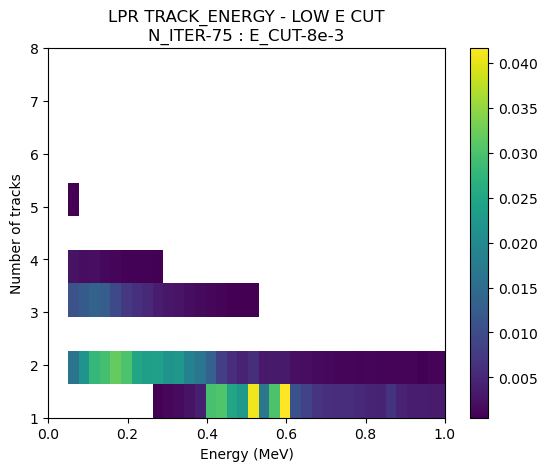

In [16]:
load_and_plot('data/75_8e-3/isaura/', 'LPR TRACK_ENERGY\nN_ITER-75 : E_CUT-8e-3')
load_and_plot_and_cut('data/75_8e-3/isaura/', 'LPR TRACK_ENERGY - LOW E CUT\nN_ITER-75 : E_CUT-8e-3')

50
100
150
200
250
300


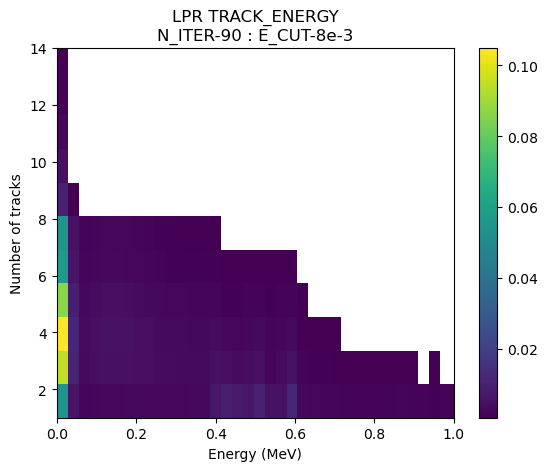

50
100
150
200
250
300


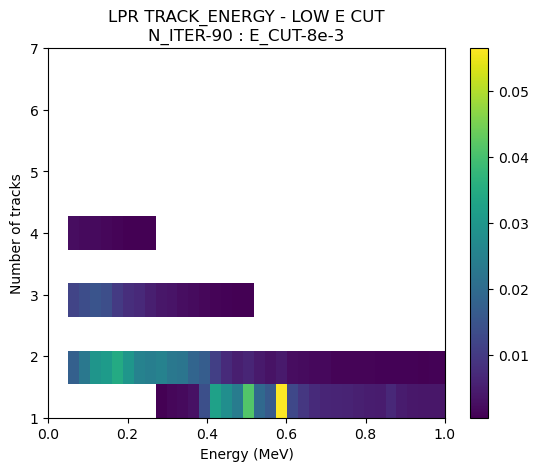

In [17]:
load_and_plot('data/90_8e-3/isaura/', 'LPR TRACK_ENERGY\nN_ITER-90 : E_CUT-8e-3')
load_and_plot_and_cut('data/90_8e-3/isaura/', 'LPR TRACK_ENERGY - LOW E CUT\nN_ITER-90 : E_CUT-8e-3')

### FOM now

50
100
150
200
250
300


/home/e78368jw/Documents/NEXT_CODE/next_misc/core/functions.py:233: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  remove_low_E['numb_of_tracks'] = remove_low_E['event'].map(event_counts)


Cutting events around fiducial volume related to:
Z range between 20 and 1170
Radius range < 415
Fiducial track cut
Relative Cut efficiency:
Efficiency: 47.14 %
Absolute Cut efficiency:
Efficiency: 47.14 %
One track cut
Relative Cut efficiency:
Efficiency: 71.80 %
Absolute Cut efficiency:
Efficiency: 65.34 %
Blob overlap cut
Relative Cut efficiency:
Efficiency: 71.50 %
Absolute Cut efficiency:
Efficiency: 65.75 %
Energy cut
Relative Cut efficiency:
Efficiency: 11.11 %
Absolute Cut efficiency:
Efficiency: 6.47 %


/home/e78368jw/Documents/NEXT_CODE/next_misc/core/functions.py:390: RuntimeWarning: divide by zero encountered in double_scalars
  fom.append(e[i]/np.sqrt(b[i]))
/home/e78368jw/Documents/NEXT_CODE/next_misc/core/functions.py:390: RuntimeWarning: invalid value encountered in double_scalars
  fom.append(e[i]/np.sqrt(b[i]))
No handles with labels found to put in legend.


FOM values:
[1.00000000e+000 1.00000000e+000 1.00542527e+000 1.02412247e+000
 1.07546411e+000 1.15087607e+000 1.26377394e+000 1.39226376e+000
 1.50110382e+000 1.62974432e+000 1.75078810e+000 1.84551560e+000
 1.99859038e+000 2.13634041e+000 2.23795526e+000 2.28193297e+000
 2.39460906e+000 2.44898786e+000 2.53223218e+000 2.55553960e+000
 2.65701041e+000 2.67837621e+000 2.76503563e+000 2.82103205e+000
 2.85424747e+000 2.87608405e+000 2.97669448e+000 3.04949887e+000
 3.23947113e+000 3.27242313e+000 3.30884041e+000 3.45380350e+000
 3.38830726e+000 3.37941870e+000 3.67582090e+000 3.59612436e+000
 3.59941237e+000 3.52123219e+000 2.91759239e+000 2.47045179e+000
 2.10156080e+000 2.02653044e+000 1.65220316e+000 1.43276993e+000
 1.20042886e+000 1.63206318e+000 1.45320694e+000 1.79769313e+308
 1.79769313e+308 1.79769313e+308 1.79769313e+308 1.79769313e+308
 1.79769313e+308 1.79769313e+308 1.79769313e+308 1.79769313e+308
 1.79769313e+308 1.79769313e+308 0.00000000e+000 0.00000000e+000
 0.00000000e+

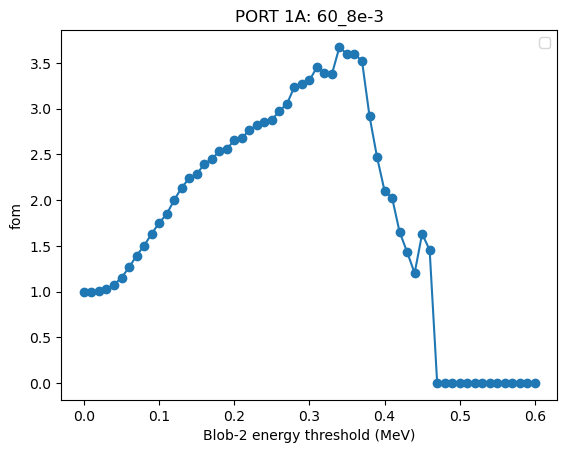

In [17]:
fom_60 = load_plot_cut_FOM('data/60_8e-3/isaura/', title = "PORT 1A: 60_8e-3")

50
100
150
200
250
300


/home/e78368jw/Documents/NEXT_CODE/next_misc/core/functions.py:233: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  remove_low_E['numb_of_tracks'] = remove_low_E['event'].map(event_counts)


Cutting events around fiducial volume related to:
Z range between 20 and 1170
Radius range < 415
Fiducial track cut
Relative Cut efficiency:
Efficiency: 46.56 %
Absolute Cut efficiency:
Efficiency: 46.56 %
One track cut
Relative Cut efficiency:
Efficiency: 72.18 %
Absolute Cut efficiency:
Efficiency: 65.24 %
Blob overlap cut
Relative Cut efficiency:
Efficiency: 72.75 %
Absolute Cut efficiency:
Efficiency: 65.79 %
Energy cut
Relative Cut efficiency:
Efficiency: 10.96 %
Absolute Cut efficiency:
Efficiency: 6.12 %


/home/e78368jw/Documents/NEXT_CODE/next_misc/core/functions.py:390: RuntimeWarning: divide by zero encountered in double_scalars
  fom.append(e[i]/np.sqrt(b[i]))
/home/e78368jw/Documents/NEXT_CODE/next_misc/core/functions.py:390: RuntimeWarning: invalid value encountered in double_scalars
  fom.append(e[i]/np.sqrt(b[i]))
No handles with labels found to put in legend.


FOM values:
[1.00000000e+000 1.00000000e+000 1.00161347e+000 1.01734422e+000
 1.04987627e+000 1.13418510e+000 1.23325490e+000 1.35891321e+000
 1.50275195e+000 1.60334895e+000 1.70678941e+000 1.82392537e+000
 1.94682632e+000 2.06638348e+000 2.13853298e+000 2.25113637e+000
 2.35890224e+000 2.46543156e+000 2.47568161e+000 2.56754977e+000
 2.56156145e+000 2.61891139e+000 2.62241410e+000 2.69621624e+000
 2.63976396e+000 2.80091400e+000 2.84263249e+000 2.99201956e+000
 3.32882494e+000 3.45737794e+000 3.52595489e+000 3.52330684e+000
 3.26983152e+000 3.36591291e+000 2.97810121e+000 2.60492390e+000
 2.79605215e+000 2.37485198e+000 2.07911570e+000 1.75649430e+000
 1.45179631e+000 1.29585147e+000 1.25124154e+000 1.06465289e+000
 1.17968184e+000 1.47075760e+000 1.11953190e+000 1.79769313e+308
 1.79769313e+308 1.79769313e+308 1.79769313e+308 1.79769313e+308
 1.79769313e+308 1.79769313e+308 1.79769313e+308 1.79769313e+308
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+

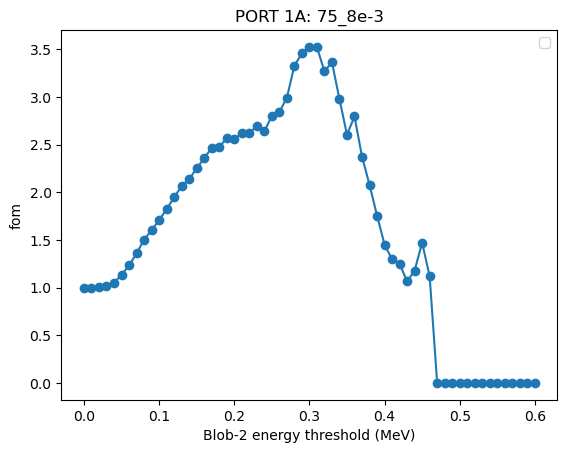

In [18]:
fom_75 = load_plot_cut_FOM('data/75_8e-3/isaura/', title = "PORT 1A: 75_8e-3")

50
100
150
200
250
300


/home/e78368jw/Documents/NEXT_CODE/next_misc/core/functions.py:233: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  remove_low_E['numb_of_tracks'] = remove_low_E['event'].map(event_counts)


Cutting events around fiducial volume related to:
Z range between 20 and 1170
Radius range < 415
Fiducial track cut
Relative Cut efficiency:
Efficiency: 46.16 %
Absolute Cut efficiency:
Efficiency: 46.16 %
One track cut
Relative Cut efficiency:
Efficiency: 72.41 %
Absolute Cut efficiency:
Efficiency: 65.14 %
Blob overlap cut
Relative Cut efficiency:
Efficiency: 73.81 %
Absolute Cut efficiency:
Efficiency: 66.16 %
Energy cut
Relative Cut efficiency:
Efficiency: 10.73 %
Absolute Cut efficiency:
Efficiency: 5.89 %


/home/e78368jw/Documents/NEXT_CODE/next_misc/core/functions.py:390: RuntimeWarning: divide by zero encountered in double_scalars
  fom.append(e[i]/np.sqrt(b[i]))
/home/e78368jw/Documents/NEXT_CODE/next_misc/core/functions.py:390: RuntimeWarning: invalid value encountered in double_scalars
  fom.append(e[i]/np.sqrt(b[i]))
No handles with labels found to put in legend.


FOM values:
[1.00000000e+000 1.00000000e+000 9.99421683e-001 1.00760066e+000
 1.03830061e+000 1.11153895e+000 1.21826846e+000 1.33516576e+000
 1.50653467e+000 1.60227677e+000 1.69506268e+000 1.83192370e+000
 1.97007482e+000 2.10190262e+000 2.19493806e+000 2.25018601e+000
 2.46054652e+000 2.51972081e+000 2.55474518e+000 2.53563397e+000
 2.58901278e+000 2.71930994e+000 2.77807352e+000 2.75183785e+000
 2.75141814e+000 2.90723131e+000 3.01239860e+000 3.21951417e+000
 3.47718592e+000 3.80872438e+000 3.57106998e+000 3.46857472e+000
 3.18570699e+000 3.19406638e+000 3.18404907e+000 2.92755622e+000
 2.53839467e+000 2.11385480e+000 1.83082821e+000 1.68584298e+000
 1.44362416e+000 1.38654143e+000 1.26332073e+000 1.30213737e+000
 1.14894474e+000 8.57878740e-001 1.01824136e+000 7.14935423e-001
 5.19953035e-001 3.46635357e-001 1.73317678e-001 1.51652969e-001
 8.66588392e-002 1.79769313e+308 1.79769313e+308 1.79769313e+308
 1.79769313e+308 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+

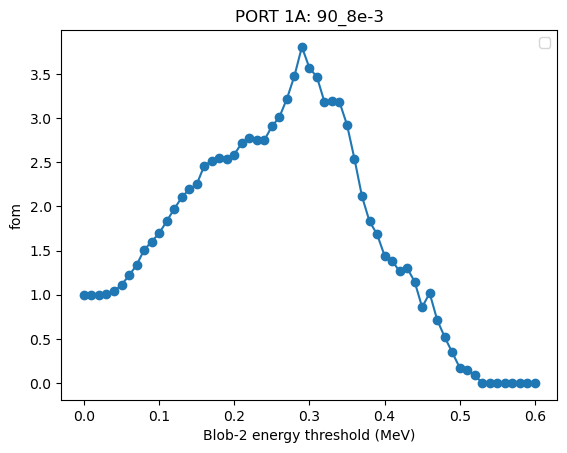

In [19]:
fom_90 = load_plot_cut_FOM('data/90_8e-3/isaura/', title = "PORT 1A: 90_8e-3")

In [24]:
print("60_8e-3\nFOM max: {}\nBlob-2 threshold: {}".format(fom_60[2], fom_60[3]))
print("===============================")
print("75_8e-3\nFOM max: {}\nBlob-2 threshold: {}".format(fom_75[2], fom_75[3]))
print("===============================")
print("90_8e-3\nFOM max: {}\nBlob-2 threshold: {}".format(fom_90[2], fom_90[3]))

60_8e-3
FOM max: 3.675820899877574
Blob-2 threshold: 0.34
75_8e-3
FOM max: 3.5259548925864133
Blob-2 threshold: 0.3
90_8e-3
FOM max: 3.8087243767159182
Blob-2 threshold: 0.29


### Looking further at the blob_2 value plots

In [9]:
file = func.load_data('data/60_8e-3/isaura/')
tracks = file[0]
particles = file[1]
evtmap = file[2]


# cut
tracks_low_E = func.remove_low_E_events(tracks)

cut_tracks = func.apply_cuts(tracks_low_E, lower_z = 20, upper_z = 1170, r_lim = 415)

50
100
150
200
250
300
Cutting events around fiducial volume related to:
Z range between 20 and 1170
Radius range < 415
Fiducial track cut
Relative Cut efficiency:
Efficiency: 47.14 %
Absolute Cut efficiency:
Efficiency: 47.14 %
One track cut
Relative Cut efficiency:
Efficiency: 71.80 %
Absolute Cut efficiency:
Efficiency: 65.34 %
Blob overlap cut
Relative Cut efficiency:
Efficiency: 71.50 %
Absolute Cut efficiency:
Efficiency: 65.75 %
Energy cut
Relative Cut efficiency:
Efficiency: 11.11 %
Absolute Cut efficiency:
Efficiency: 6.47 %


/home/e78368jw/Documents/NEXT_CODE/next_misc/core/functions.py:233: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  remove_low_E['numb_of_tracks'] = remove_low_E['event'].map(event_counts)


In [26]:
display(tracks)

,event,trackID,energy,length,numb_of_voxels,numb_of_hits,numb_of_tracks,x_min,y_min,z_min,...,blob1_z,blob2_x,blob2_y,blob2_z,eblob1,eblob2,ovlp_blob_energy,vox_size_x,vox_size_y,vox_size_z
0,5080002,0,1.431706,312.871967,48,5364,3,-79.325,344.675,499.470366,...,651.565664,151.612901,367.368118,502.161156,0.396586,0.151293,0.000000,14.50,14.250,14.263647
1,5080002,1,0.655574,70.009130,18,2459,3,-100.325,416.675,603.385913,...,649.900999,-88.914140,426.845252,608.534480,0.383716,0.089866,0.000000,14.50,14.250,14.263647
2,5080002,2,0.021499,20.330089,2,58,3,29.675,411.675,618.959316,...,622.045200,33.887135,414.654233,621.099678,0.021499,0.021499,0.021499,14.50,14.250,14.263647
3,5080004,0,0.471118,33.710800,6,3188,5,15.675,-319.325,149.169202,...,153.775312,23.237835,-289.733672,154.998646,0.356540,0.326045,0.211561,14.00,13.875,11.455763
4,5080004,1,0.003369,14.000000,2,44,5,57.675,-347.325,154.748278,...,154.748278,62.232112,-344.142494,154.748278,0.003369,0.003369,0.003369,14.00,13.875,11.455763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212731,4060710,0,0.568012,65.689671,28,7819,1,303.675,279.675,522.659780,...,529.148320,335.928113,287.058014,525.101538,0.172267,0.080194,0.000000,14.25,15.000,14.432458
212732,4060712,0,0.896336,100.945429,38,6975,4,11.675,411.675,332.916150,...,343.860908,19.337370,473.083129,414.692959,0.615138,0.080329,0.000000,13.00,14.500,12.914461
212733,4060712,1,0.000498,0.000000,1,12,4,-3.325,364.675,351.397889,...,351.397889,-1.835199,365.684019,351.397889,0.000498,0.000498,0.000498,13.00,14.500,12.914461
212734,4060712,2,0.000073,0.000000,1,2,4,73.675,412.675,357.396638,...,357.396638,74.172839,412.675000,357.396638,0.000073,0.000073,0.000073,13.00,14.500,12.914461


In [10]:
def plot_blob2(data_path, title = "blob2 plot"):

    file = func.load_data(data_path)
    tracks = file[0]


    # cut
    tracks_low_E = func.remove_low_E_events(tracks)

    cut_tracks = func.apply_cuts(tracks_low_E, lower_z = 20, upper_z = 1170, r_lim = 415)

    pos_df = func.positron_scraper(data_path)
    pos_events = (np.unique(pos_df['event_id'].to_numpy()))*2
    ecut_no_positron_df = cut_tracks[~cut_tracks['event'].isin(pos_events)]
    ecut_positron_df = cut_tracks[cut_tracks['event'].isin(pos_events)]

    func.plot_hist(cut_tracks, column = 'eblob2', fill = False, label='All tracks')
    func.plot_hist(ecut_no_positron_df, column = 'eblob2', label = 'Background tracks')
    func.plot_hist(ecut_positron_df, column = 'eblob2', title = title, label = 'Positron tracks')
    plt.legend()
    plt.show()

In [12]:
pos_df = func.positron_scraper('data/60_8e-3/isaura/')

In [21]:
pos_events = (np.unique(pos_df['event_id'].to_numpy()))*2
ecut_no_positron_df = cut_tracks[0][~cut_tracks[0]['event'].isin(pos_events)]
ecut_positron_df = cut_tracks[0][cut_tracks[0]['event'].isin(pos_events)]

In [ ]:
display(ecut_positron_df)

,event,trackID,energy,length,numb_of_voxels,numb_of_hits,numb_of_tracks,x_min,y_min,z_min,...,blob1_z,blob2_x,blob2_y,blob2_z,eblob1,eblob2,ovlp_blob_energy,vox_size_x,vox_size_y,vox_size_z
11,5080008,0,0.312031,25.051915,6,3049,5,206.675,203.675,252.050958,...,259.781000,227.072253,220.932260,268.676259,0.309568,0.302223,0.299773,14.375000,14.357143,14.657089
12,5080008,1,0.115633,20.529756,4,1240,5,235.675,347.675,437.909588,...,440.428446,252.164814,358.190212,443.920902,0.115629,0.115518,0.115518,14.375000,14.357143,14.657089
13,5080008,2,0.029553,14.375000,2,802,5,192.675,232.675,536.637281,...,541.353034,200.349212,235.212055,542.987638,0.028626,0.026851,0.025925,14.375000,14.357143,14.657089
14,5080008,3,0.000606,0.000000,1,66,5,283.675,352.675,443.566561,...,443.566561,288.044746,356.192490,443.566561,0.000606,0.000606,0.000606,14.375000,14.357143,14.657089
15,5080008,4,0.000165,0.000000,1,13,5,177.675,225.675,260.876979,...,260.876979,179.659492,226.686660,260.876979,0.000165,0.000165,0.000165,14.375000,14.357143,14.657089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212693,4060680,2,0.033173,0.000000,1,540,3,264.675,255.675,506.981738,...,510.611047,270.736174,257.997272,510.611047,0.033173,0.033173,0.033173,14.416667,14.750000,14.850021
212732,4060712,0,0.896336,100.945429,38,6975,4,11.675,411.675,332.916150,...,343.860908,19.337370,473.083129,414.692959,0.615138,0.080329,0.000000,13.000000,14.500000,12.914461
212733,4060712,1,0.000498,0.000000,1,12,4,-3.325,364.675,351.397889,...,351.397889,-1.835199,365.684019,351.397889,0.000498,0.000498,0.000498,13.000000,14.500000,12.914461
212734,4060712,2,0.000073,0.000000,1,2,4,73.675,412.675,357.396638,...,357.396638,74.172839,412.675000,357.396638,0.000073,0.000073,0.000073,13.000000,14.500000,12.914461


In [ ]:
display(pos_df)

,event_id,particle_id,particle_name,primary,mother_id,initial_x,initial_y,initial_z,initial_t,final_x,...,initial_momentum_x,initial_momentum_y,initial_momentum_z,final_momentum_x,final_momentum_y,final_momentum_z,kin_energy,length,creator_proc,final_proc
302,2540004,42,e+,False,40,399.615417,394.366058,536.815430,0.004905,399.746094,...,0.780250,0.557767,1.590467,-0.0,-0.0,0.0,1.415293,1.324204,conv,annihil
1182,2540016,32,e+,False,30,-166.862320,-370.026581,1148.358154,3.770954,-198.535721,...,-0.247377,-0.461457,1.173200,0.0,0.0,-0.0,0.871628,187.018860,conv,annihil
1375,2540018,37,e+,False,35,-65.955795,324.198029,272.437469,1.781441,-22.099428,...,-1.258216,-0.110806,-0.581811,0.0,-0.0,0.0,0.970557,263.940033,conv,annihil
1757,2540024,18,e+,False,16,394.422913,407.527100,535.740845,0.035130,394.485077,...,0.217861,0.929769,-0.199142,0.0,-0.0,0.0,0.590233,0.248721,conv,annihil
1829,2540025,43,e+,False,41,466.010071,219.144073,487.874298,0.656721,466.172241,...,0.595691,-1.389832,-0.308319,0.0,0.0,0.0,1.114628,0.823723,conv,annihil
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811463,2030304,38,e+,False,36,177.461746,373.692688,428.131470,0.812318,178.767731,...,-0.777295,0.036702,-0.102590,0.0,0.0,0.0,0.425579,101.616592,conv,annihil
812092,2030312,29,e+,False,27,397.566254,407.091736,551.510803,0.072451,397.579163,...,-0.019162,0.906891,1.363706,0.0,0.0,-0.0,1.204703,0.740120,conv,annihil
814364,2030340,26,e+,False,24,310.088898,408.188171,295.903961,0.852721,310.023529,...,-0.195946,-0.591557,-1.454987,-0.0,-0.0,0.0,1.152263,0.804377,conv,annihil
815553,2030354,86,e+,False,84,399.468445,406.446594,534.138794,0.026582,399.559052,...,0.388743,0.701915,-0.266944,0.0,-0.0,-0.0,0.477022,0.336314,conv,annihil


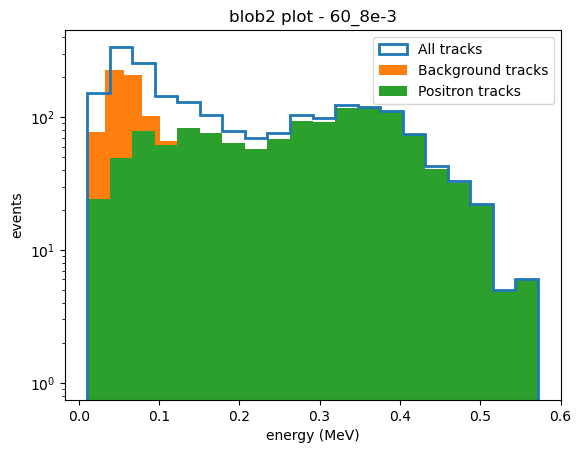

In [25]:
func.plot_hist(cut_tracks[0], column = 'eblob2', fill = False, label='All tracks')
func.plot_hist(ecut_no_positron_df, column = 'eblob2', label = 'Background tracks')
func.plot_hist(ecut_positron_df, column = 'eblob2', title = 'blob2 plot - 60_8e-3', label = 'Positron tracks')
plt.legend()
plt.show()

In [18]:
display(cut_tracks[0])

,event,trackID,energy,length,numb_of_voxels,numb_of_hits,numb_of_tracks,x_min,y_min,z_min,...,blob1_z,blob2_x,blob2_y,blob2_z,eblob1,eblob2,ovlp_blob_energy,vox_size_x,vox_size_y,vox_size_z
98,5080086,0,1.683154,299.401776,83,7997,1,-240.325,-174.325,1037.969888,...,1062.207128,-217.517480,-41.454428,1044.662387,0.461581,0.069881,0.0,13.444444,14.000000,13.632267
197,5080188,0,1.596666,143.251730,55,9063,1,157.675,107.675,732.606853,...,784.980713,245.719764,183.798511,738.903604,0.517204,0.304872,0.0,13.714286,14.142857,13.750328
408,5080380,0,1.525134,191.469686,54,8325,1,13.675,-252.325,90.152139,...,100.682260,88.084846,-139.105546,211.835034,0.263974,0.044767,0.0,13.833333,14.875000,13.890411
537,5080496,0,1.594726,157.208665,57,9428,1,142.675,-164.325,324.260803,...,348.166712,152.496893,-122.751087,333.828100,0.433415,0.414050,0.0,14.142857,13.142857,13.214012
553,5080512,0,1.597181,97.821970,42,9700,1,200.675,202.675,573.029888,...,580.205114,246.861629,211.379999,621.206025,0.462966,0.315179,0.0,13.750000,13.333333,13.990134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212559,4060532,0,1.596029,150.645399,69,7771,1,110.675,-361.325,835.419309,...,890.923373,208.832805,-340.823027,918.950299,0.107479,0.056593,0.0,13.250000,13.500000,12.964603
212568,4060546,0,1.594818,355.374934,88,9029,1,204.675,77.675,414.406552,...,452.170892,253.836848,209.435464,598.950967,0.474162,0.088262,0.0,14.388889,14.333333,14.974436
212574,4060550,0,1.624089,247.751123,81,9270,1,-44.325,-183.325,532.076081,...,714.992822,-5.082216,-162.844441,535.448702,0.441376,0.073843,0.0,14.500000,12.200000,14.726810
212628,4060606,0,1.592988,79.387576,44,9171,1,66.675,4.675,499.630786,...,533.031203,75.628319,25.371512,522.271665,0.433791,0.367558,0.0,14.000000,13.250000,13.244479


60_8e-3


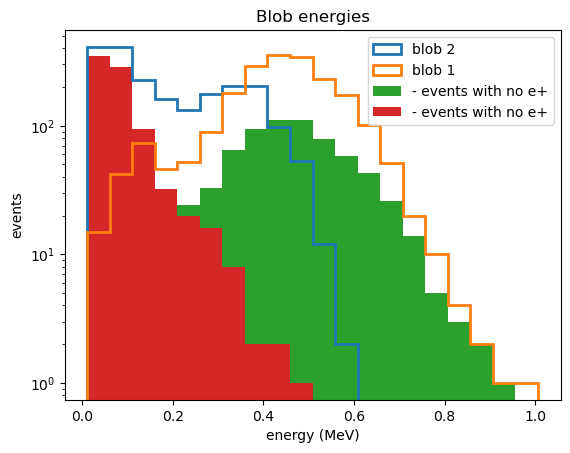

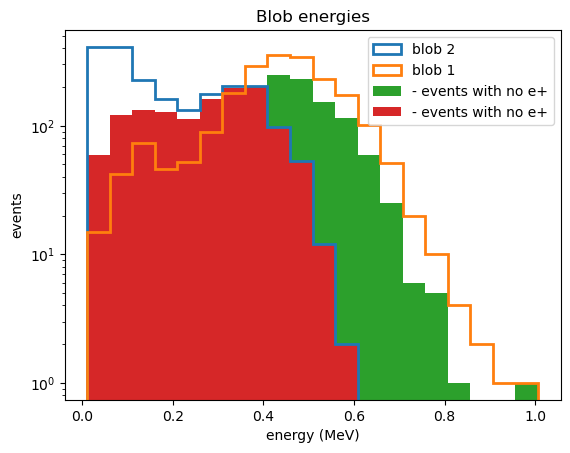

In [68]:
print("60_8e-3")
func.blob_positron_plot(cut_tracks[0], ecut_no_positron_df)
func.blob_positron_plot(cut_tracks[0], ecut_positron_df)

In [71]:
def blob_positron_plot(ecut_rel, ecut_no_positron_df, save = False, save_title = 'plot.png', blob_label = "- events with no e+"):
    '''
    Plots the blob energies with and without positrons.
    '''
    # make range full range of blob1 and blob2
    eblob_full = []
    eblob_full.append(ecut_rel['eblob1'].to_numpy())
    eblob_full.append(ecut_rel['eblob2'].to_numpy())
    minimum_e = np.min(eblob_full)
    maximum_e = np.max(eblob_full)

    # the original way
    func.plot_hist(ecut_rel, column = 'eblob2', binning = 20, title = "Blob energies", output = False, fill = False, label = 'blob 2', x_label = 'energy (MeV)', range = (minimum_e, maximum_e), log = False)
    func.plot_hist(ecut_rel, column = 'eblob1', binning = 20, title = "Blob energies", output = False, fill = False, label = 'blob 1', x_label = 'energy (MeV)', range = (minimum_e, maximum_e), log = False)

    #plt.hist(no_pos_blob1, bins = 20, label = 'events with no e+', range = (minimum_e, maximum_e))
    #plt.hist(no_pos_blob2, bins = 20, label = 'events with no e+', range = (minimum_e, maximum_e))

    func.plot_hist(ecut_no_positron_df, column = 'eblob1', binning = 20, title = "Blob energies", output = False, fill = True, label = blob_label, x_label = 'energy (MeV)', range = (minimum_e, maximum_e), log = False)
    func.plot_hist(ecut_no_positron_df, column = 'eblob2', binning = 20, title = "Blob energies", output = False, fill = True, label = blob_label, x_label = 'energy (MeV)', range = (minimum_e, maximum_e), log = False)

    plt.legend()

    if (save == True):
        plt.savefig(save_title)
    plt.show()


60_8e-3


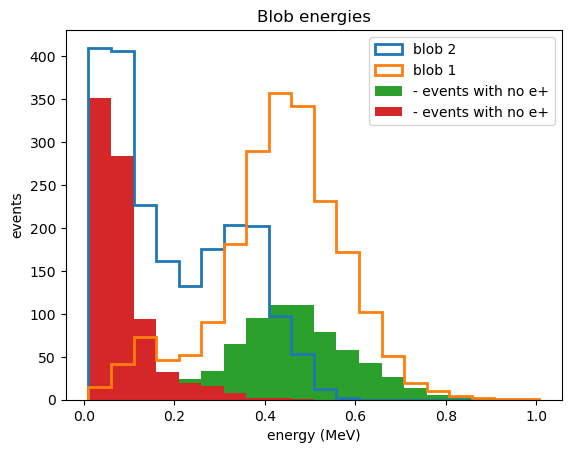

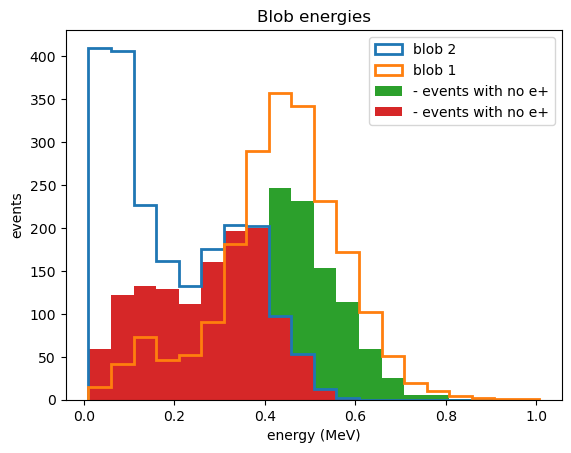

In [72]:
print("60_8e-3")
blob_positron_plot(cut_tracks[0], ecut_no_positron_df)
blob_positron_plot(cut_tracks[0], ecut_positron_df)

In [67]:
display(pos_events[11264])
display(ecut_positron_df)

5080188

,event,trackID,energy,length,numb_of_voxels,numb_of_hits,numb_of_tracks,x_min,y_min,z_min,...,blob1_z,blob2_x,blob2_y,blob2_z,eblob1,eblob2,ovlp_blob_energy,vox_size_x,vox_size_y,vox_size_z
197,5080188,0,1.596666,143.251730,55,9063,1,157.675,107.675,732.606853,...,784.980713,245.719764,183.798511,738.903604,0.517204,0.304872,0.0,13.714286,14.142857,13.750328
537,5080496,0,1.594726,157.208665,57,9428,1,142.675,-164.325,324.260803,...,348.166712,152.496893,-122.751087,333.828100,0.433415,0.414050,0.0,14.142857,13.142857,13.214012
553,5080512,0,1.597181,97.821970,42,9700,1,200.675,202.675,573.029888,...,580.205114,246.861629,211.379999,621.206025,0.462966,0.315179,0.0,13.750000,13.333333,13.990134
636,5080582,0,1.597251,146.573076,61,7593,1,296.675,-46.325,681.238031,...,725.635332,337.166187,56.944068,714.316126,0.422622,0.224613,0.0,14.142857,14.500000,13.223831
734,5080676,0,1.594962,142.977149,49,8853,1,179.675,146.675,453.319420,...,464.630347,273.150100,156.986665,509.194918,0.604149,0.368655,0.0,14.571429,14.833333,13.097077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212353,4060350,0,1.594231,180.619138,71,9260,1,51.675,26.675,412.437638,...,443.804809,99.597165,71.943731,540.398029,0.478779,0.422361,0.0,14.750000,13.500000,14.974961
212483,4060472,0,1.595414,106.206510,66,8921,1,82.675,84.675,180.581346,...,190.657476,122.465124,106.985976,257.221128,0.410101,0.139185,0.0,12.666667,14.000000,13.460095
212508,4060498,0,1.591080,150.694614,61,9133,1,14.675,-226.325,487.036988,...,491.892101,37.727892,-216.829778,536.203446,0.471150,0.320035,0.0,13.333333,14.142857,13.392281
212568,4060546,0,1.594818,355.374934,88,9029,1,204.675,77.675,414.406552,...,452.170892,253.836848,209.435464,598.950967,0.474162,0.088262,0.0,14.388889,14.333333,14.974436


50
100
150
200
250
300


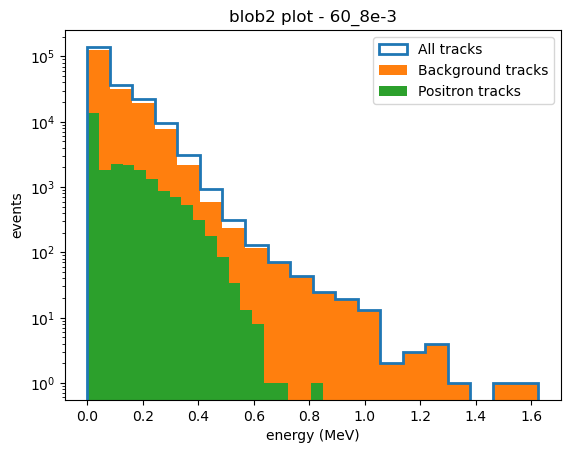

In [12]:
plot_blob2('data/60_8e-3/isaura/', title = "blob2 plot - 60_8e-3")

50
100
150
200
250
300


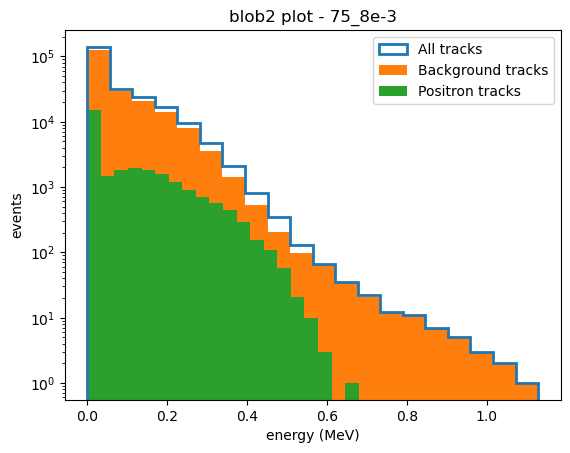

In [13]:
plot_blob2('data/75_8e-3/isaura/', title = "blob2 plot - 75_8e-3")

50
100
150
200
250
300


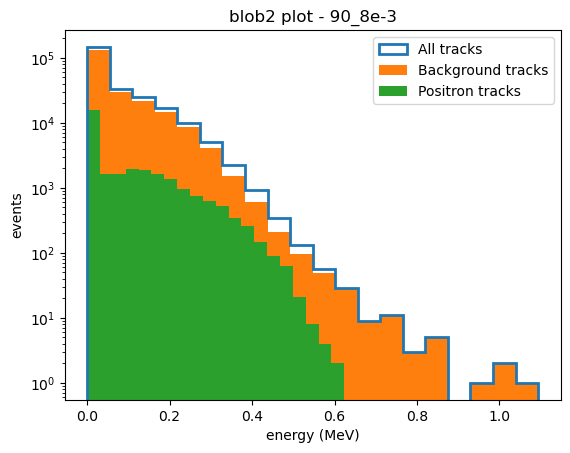

In [14]:
plot_blob2('data/90_8e-3/isaura/', title = "blob2 plot - 90_8e-3")